### **Getting data**

In [1]:
from data.data_loader import get_data
import tensorflow as tf

2023-04-17 03:54:46.103413: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 03:54:46.140068: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 03:54:46.140572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 03:54:46.934527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
seed = 0
train_tensor, validation_tensor, test_tensor = get_data(selected_fold=1, seed=seed)

In [3]:
AUTOTUNE = tf.data.AUTOTUNE

training_data = train_tensor.cache().shuffle(961).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_tensor.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_tensor.cache().prefetch(buffer_size=AUTOTUNE)

### **Training model**

In [4]:
from efficient_net import EfficientNet

EFFICIENT_NET = EfficientNet(img_dimension=224)

In [5]:
EFFICIENT_NET.fit(
    training_data,
    validation_data,
    learning_rate=0.01,
    patience=5,
    epochs=1000,
    verbose=1
)

Epoch 1/1000


2023-04-17 03:54:50.832822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [804]
	 [[{{node Placeholder/_0}}]]
2023-04-17 03:54:50.833089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [804]
	 [[{{node Placeholder/_1}}]]


29/29 [==============================] - ETA: 0s - loss: 0.7183 - roc_auc: 0.6672 - binary_accuracy: 0.6343

2023-04-17 03:55:21.252458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [268]
	 [[{{node Placeholder/_1}}]]


29/29 [==============================] - 40s 1s/step - loss: 0.7183 - roc_auc: 0.6672 - binary_accuracy: 0.6343 - val_loss: 0.5383 - val_roc_auc: 0.8411 - val_binary_accuracy: 0.7500 - lr: 0.0100
Epoch 2/1000
29/29 [==============================] - 33s 1s/step - loss: 0.5656 - roc_auc: 0.7803 - binary_accuracy: 0.7015 - val_loss: 0.4995 - val_roc_auc: 0.8463 - val_binary_accuracy: 0.7612 - lr: 0.0100
Epoch 3/1000
29/29 [==============================] - 31s 1s/step - loss: 0.5340 - roc_auc: 0.8100 - binary_accuracy: 0.7239 - val_loss: 0.4885 - val_roc_auc: 0.8535 - val_binary_accuracy: 0.7910 - lr: 0.0100
Epoch 4/1000
29/29 [==============================] - 32s 1s/step - loss: 0.4986 - roc_auc: 0.8398 - binary_accuracy: 0.7637 - val_loss: 0.4659 - val_roc_auc: 0.8663 - val_binary_accuracy: 0.8060 - lr: 0.0100
Epoch 5/1000
29/29 [==============================] - 30s 1s/step - loss: 0.4846 - roc_auc: 0.8452 - binary_accuracy: 0.7711 - val_loss: 0.4925 - val_roc_auc: 0.8614 - val_binar

In [6]:
EFFICIENT_NET.save_model('efficientnet')

In [7]:
EFFICIENT_NET

In [8]:
y_true, y_pred = EFFICIENT_NET.predict(test_data)

2023-04-17 04:08:23.732020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1399]
	 [[{{node Placeholder/_0}}]]
2023-04-17 04:08:23.732448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1399]
	 [[{{node Placeholder/_1}}]]


In [9]:
import numpy as np

y_probas_efficient = np.column_stack((1 - y_pred, y_pred))

In [10]:
from plots import plot_target_vs_score

In [11]:
plot_target_vs_score(y_true, y_pred, quantiles=10)

In [12]:
plot_target_vs_score(y_true, y_pred, quantiles=100, lower_limit=90)

In [13]:
loss, auc, accuracy = EFFICIENT_NET.evaluate(test_data, verbose=1)
loss, auc, accuracy

2023-04-17 04:09:07.462534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1399]
	 [[{{node Placeholder/_1}}]]


50/50 [==============================] - 39s 772ms/step - loss: 0.4271 - roc_auc: 0.8726 - binary_accuracy: 0.8249


(0.4270704984664917, 0.8725607395172119, 0.8248749375343323)

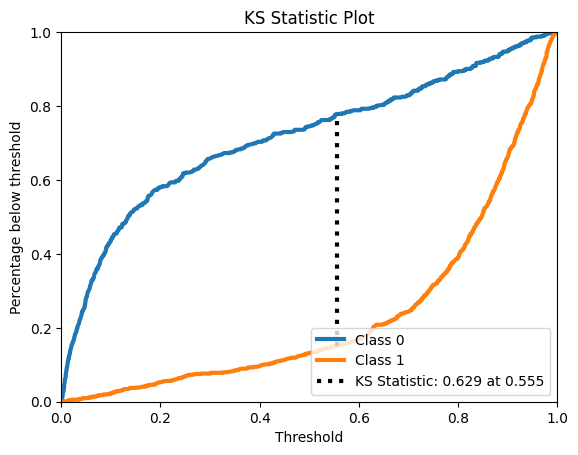

In [14]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_ks_statistic(y_true=y_true, y_probas=y_probas_efficient)
plt.show()

In [15]:
from sklearn import metrics

results = [(labels, EFFICIENT_NET.model.predict(images).reshape(-1)) for images, labels in test_data.take(-1)]

2023-04-17 04:09:46.572658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1399]
	 [[{{node Placeholder/_0}}]]
2023-04-17 04:09:46.573094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1399]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 1s 741ms/step


##### Other metrics

In [16]:
labels = np.concatenate([x[0] for x in results])
preds = np.concatenate([x[1] for x in results])

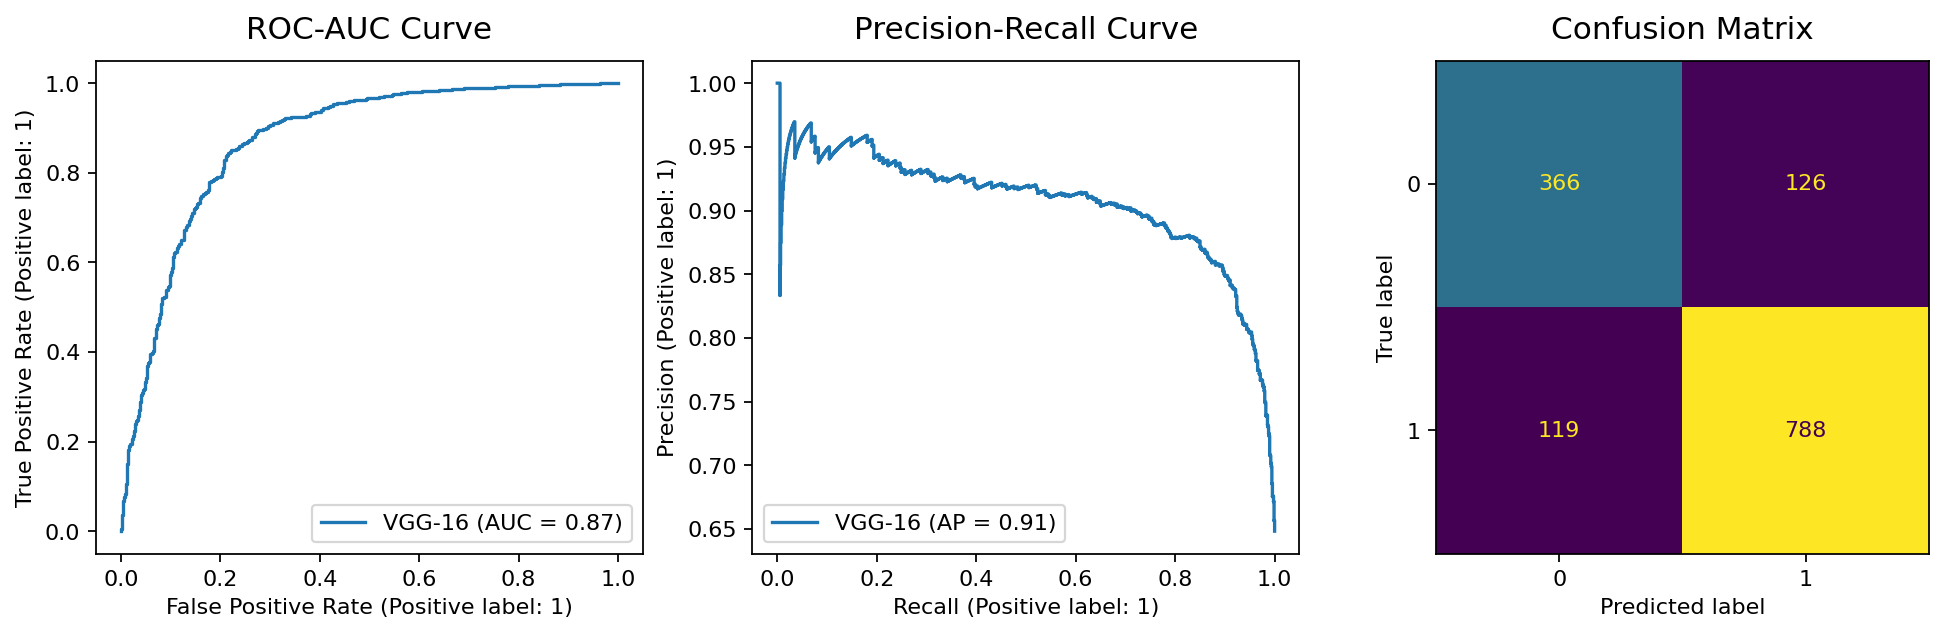

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4), dpi=160)
curves = [metrics.RocCurveDisplay, metrics.PrecisionRecallDisplay]
for ax, curve in zip(axes[:2], curves):
    curve.from_predictions(labels, preds, ax=ax, name='VGG-16')
metrics.ConfusionMatrixDisplay.from_predictions(
    labels, preds.round().astype('uint8'), ax=axes[2], colorbar=False,
)
titles = ['ROC-AUC Curve', 'Precision-Recall Curve', 'Confusion Matrix']
for ax, title in zip(axes.flat, titles):
    ax.set_title(title, size=14, pad=10)